In [15]:
#Create a regular expression tagger and various unigram and
#n-gram taggers, incorporating backoff, and train them on
#part of the Brown Corpus.
#a. Create three different combinations of the taggers.
#Test the accuracy of each combined tagger. Which combination
#works best?
#b. Try varying the size of the training corpus.
#How does it affect your results?

import nltk
#nltk.download('brown')


tagged_sents = nltk.corpus.brown.tagged_sents(categories='news')

#we will take 99% of tagged_sents size
size = int(len(tagged_sents) * 0.99)
print('whole size:',len(tagged_sents), '-> 99% of size:',size)

#split sents into train and test sets
train_sents = tagged_sents[:size]
test_sents = tagged_sents[size:]
print('training set:', train_sents)

#create regex pattern for RegexTagger
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
     ]

#first create a deafult tagger to tag all words NN
t0 = nltk.DefaultTagger('NN')
print('deafult tagger:',t0.tag('This is a test'.split()))

#second create a regex tagger to tag words based on regex and words that are not within regex are tagged with NN
#backoff will take default tagger results
tr = nltk.RegexpTagger(patterns, backoff=t0)
print('regex tagger:',tr.tag('This is a test'.split()))

#third create a unigram tagger
#backoff will take regex tagger
t1 = nltk.UnigramTagger(train_sents, backoff=tr)
print('unigram tagger:',t1.tag('This is a test'.split()))

#third create a bigram tagger
#backoff will take unigram tagger
t2 = nltk.BigramTagger(train_sents, backoff=t1)
print('bigram tagger:',t2.tag('This is a test'.split()))

print(t2.accuracy(test_sents))

whole size: 4623 -> 99% of size: 4576
training set: [[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the',

In [10]:
t0 = nltk.DefaultTagger('NN')

tr = nltk.UnigramTagger(train_sents, backoff=t0)

t1 = nltk.RegexpTagger( patterns, backoff=tr)

t2 = nltk.BigramTagger(train_sents, backoff=t1)

print(t2.accuracy(test_sents))

0.8017857142857143


In [16]:
t0 = nltk.DefaultTagger('NN')

tr = nltk.BigramTagger(train_sents, backoff=t0)

t1 = nltk.RegexpTagger(patterns, backoff=tr)

t2 = nltk.UnigramTagger(train_sents, backoff=t1)

print(t2.accuracy(test_sents))

0.8785714285714286


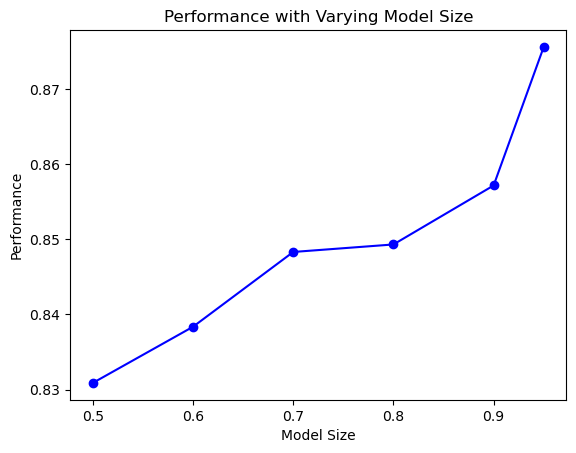

In [8]:
def performance(prec):

    size = int(len(tagged_sents) * prec)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]

    t0 = nltk.DefaultTagger('NN')
    tr = nltk.BigramTagger(train_sents, backoff=t0)
    t1 = nltk.RegexpTagger(patterns, backoff=tr)
    t2 = nltk.UnigramTagger(train_sents, backoff=t1)
    return t2.accuracy(test_sents)

def display():
    import pylab
    sizes = [0.5,0.6,0.7,0.8,0.9,0.95]
    perfs = [performance(size) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()


In [17]:
t0 = nltk.DefaultTagger('NN')

tr = nltk.BigramTagger(train_sents, backoff=t0)

t1 = nltk.RegexpTagger(patterns, backoff=tr)

t2 = nltk.UnigramTagger(train_sents, backoff=t1)

print(t2.accuracy(test_sents))

0.8785714285714286
